# Technical Analysis With python - Intro

In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import cufflinks as cf
from pandas_datareader import data

In [20]:
def fetch_ohlcv(ticker, start_date, end_date,interval="1d"):
    import yfinance as yf
    # Fetch OHLCV data from Yahoo Finance using yfinance library
    data = yf.download(ticker, start=start_date, end=end_date,interval=interval)
    # Create a pandas DataFrame
    df = pd.DataFrame(data)
    return df

In [21]:
itc_ohlcv=fetch_ohlcv('ITC.NS','2010-01-01','2020-12-31')

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

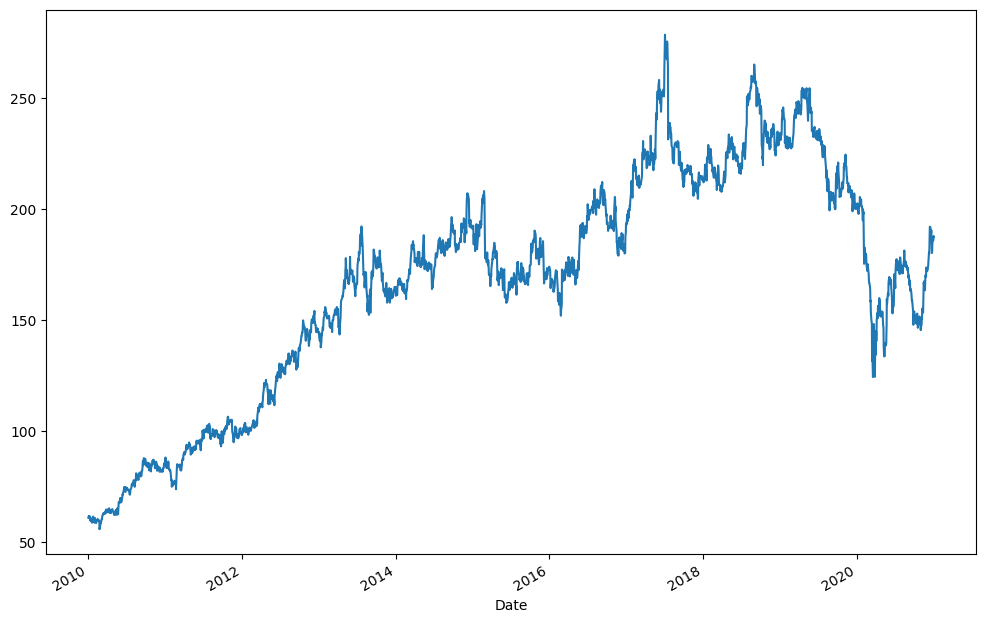

In [22]:
itc_ohlcv['Adj Close'].plot(figsize=(12,8))

<Axes: xlabel='Date'>

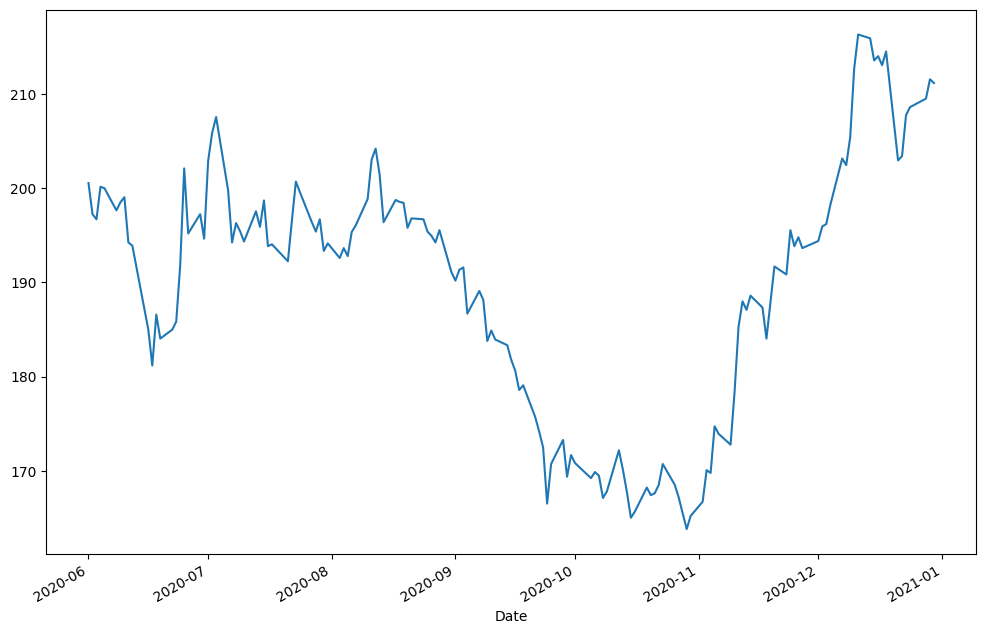

In [23]:
itc_ohlcv.loc["2020-06":,("Close")].plot(figsize=(12,8))

#### Cufflinks - Interactive line charts

In [7]:
cf.set_config_file(offline=True)

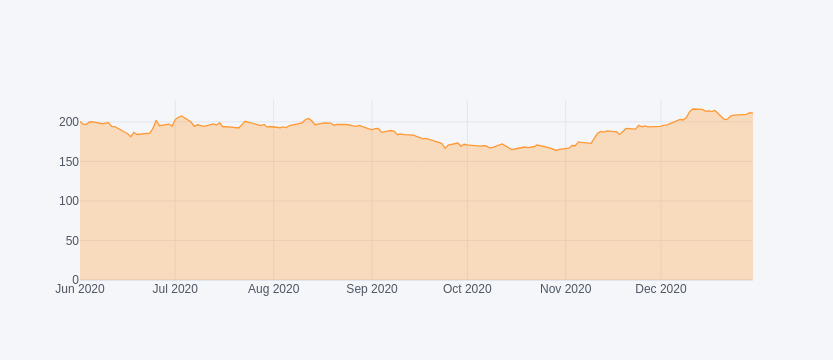

In [24]:
itc_ohlcv.loc["2020-06":,("Close")].iplot(fill=True)

In [25]:
itc_ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,84.333336,85.000000,83.449997,84.550003,60.988262,5161635
2010-01-05,84.933334,85.583336,84.233330,85.383331,61.589363,10767225
2010-01-06,86.233330,86.233330,84.533333,85.583336,61.733639,7529979
2010-01-07,85.666664,86.166664,84.566666,85.316666,61.541267,4987434
2010-01-08,85.116669,86.166664,85.116669,85.500000,61.673512,4881351
...,...,...,...,...,...,...
2020-12-23,203.000000,208.250000,202.000000,207.750000,184.501572,23695667
2020-12-24,210.000000,210.649994,205.600006,208.600006,185.256470,22768284
2020-12-28,209.000000,210.199997,207.850006,209.500000,186.055725,15741000


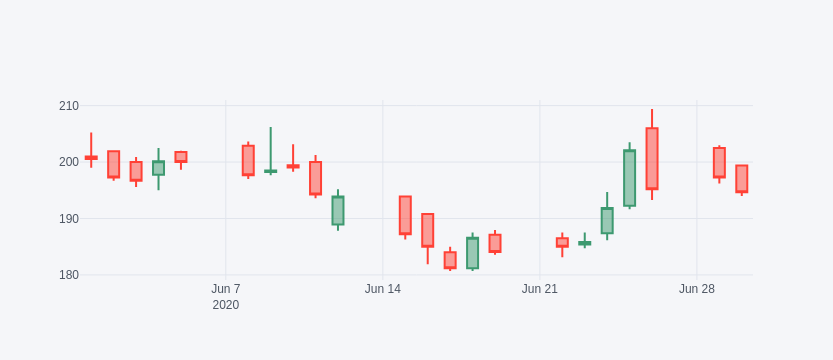

In [26]:
itc_ohlcv.loc["2020-06",("Open","Low","High","Close")].iplot(kind='candle')

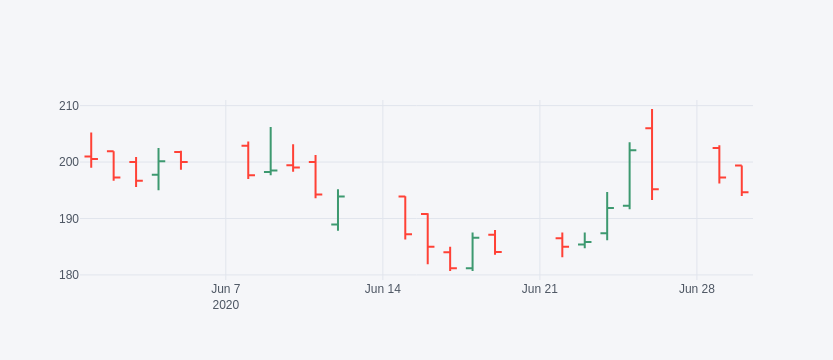

In [27]:
itc_ohlcv.loc["2020-06",("Open","Low","High","Close")].iplot(kind='ohlc')

In [37]:
bdl_weekly_ohlcv = fetch_ohlcv("BDL.NS","2023-07-01","2023-08-27","1wk")

[*********************100%***********************]  1 of 1 completed


In [38]:
bdl_weekly_ohlcv

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-03,1126.400024,1135.849976,1088.800049,1103.000000,1103.000000,2124305
2023-07-10,1102.000000,1278.000000,1077.500000,1181.199951,1181.199951,14531883
2023-07-17,1184.000000,1205.150024,1145.099976,1178.949951,1178.949951,2204421
2023-07-24,1184.400024,1214.000000,1160.000000,1201.099976,1201.099976,1514497
2023-07-31,1205.000000,1237.349976,1112.000000,1164.300049,1164.300049,2677864
2023-08-07,1154.949951,1160.000000,1093.099976,1127.500000,1127.500000,1567471
2023-08-14,1129.500000,1179.849976,1102.349976,1108.449951,1108.449951,1955023
2023-08-21,1114.849976,1180.400024,1099.000000,1120.150024,1120.150024,1634735


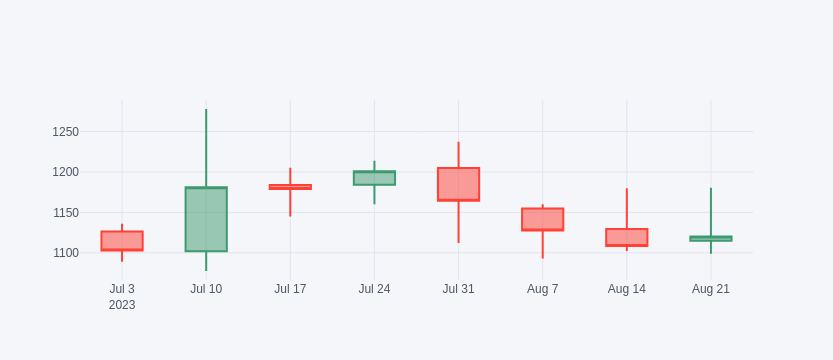

In [39]:
bdl_weekly_ohlcv.iplot(kind='candle')

In [47]:
quant_figure = cf.QuantFig(df=itc_ohlcv.loc["5-2020"])
type(quant_figure)

cufflinks.quant_figure.QuantFig

In [48]:
quant_figure.add_volume()

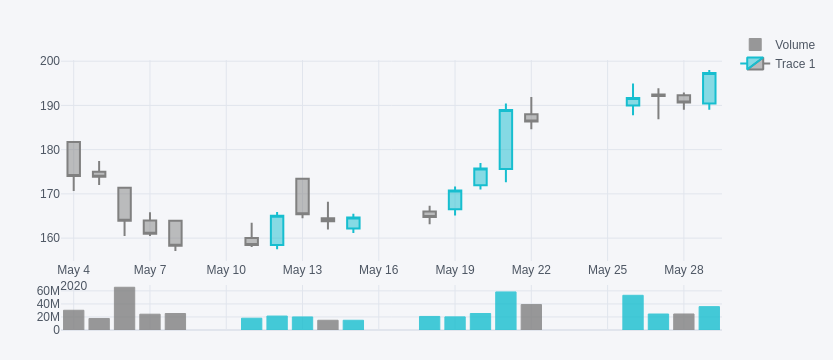

In [49]:
quant_figure.iplot()

#### Technical Indicators

In [72]:
quant_figure = cf.QuantFig(df=itc_ohlcv.loc["5-2020":])
type(quant_figure)

cufflinks.quant_figure.QuantFig

In [54]:
quant_figure.add_sma(periods=20)

In [56]:
quant_figure.add_bollinger_bands(periods=14,boll_std=2)

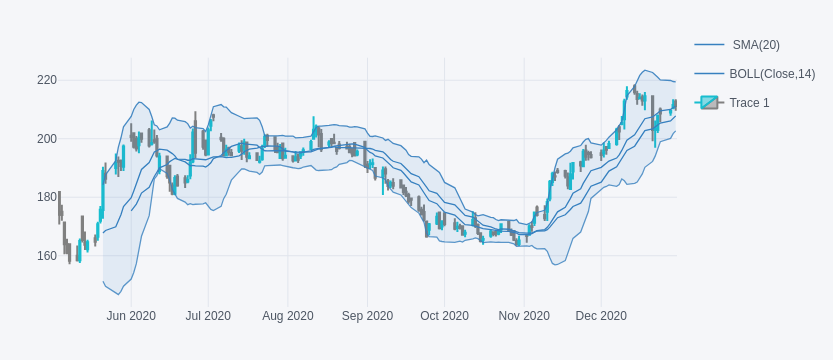

In [57]:
quant_figure.iplot(kind="candle")

#### Trend lines

In [73]:
quant_figure.add_trendline(date0="2020-11-09",date1="2020-11-18")

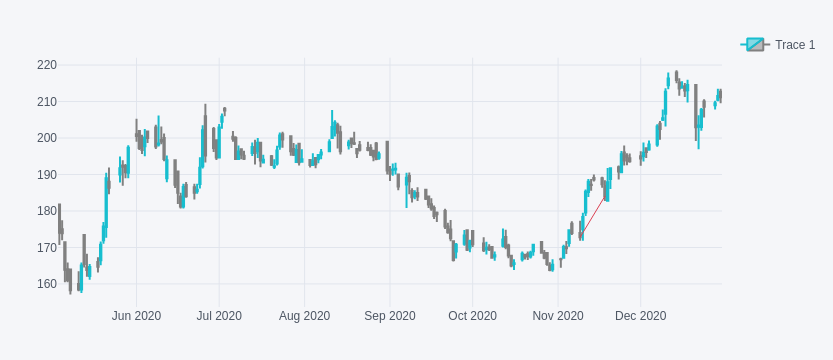

In [74]:
quant_figure.iplot(kind="candle")